In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
plt.rcParams['font.family'] = 'Arial'
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
data = pd.read_csv('data.csv')
data=data.loc[:, 'Ng1':'DG']
data

,Ng1,Ng2,Ng3,Nfl,Na,Pa,Ph,Cls,Tr,Pb,Css,DG
0,30,266,1224,1,25,5,2,t,n,s,mms,1
1,17,409,12182,2,0,13,7,t,n,s,mms,2
2,17,716,7056,2,5,12,6,o,q,s,mms,2
3,4,651,105,2,80,5,4,n,n,s,mms,1
4,3,1387,3909,5,40,5,10,t,n,o,mmb,1
...,...,...,...,...,...,...,...,...,...,...,...,...
214834,10,1007,10666,2,40,5,4,t,n,s,mms,2
214835,4,1235,4976,3,25,9,7,t,q,s,mms,1
214836,20,1359,1810,2,5,7,5,t,n,s,mms,1
214837,17,303,9803,3,55,10,6,t,q,s,mms,2


In [3]:
x=data.loc[:, 'Ng1':'Css']
x

,Ng1,Ng2,Ng3,Nfl,Na,Pa,Ph,Cls,Tr,Pb,Css
0,30,266,1224,1,25,5,2,t,n,s,mms
1,17,409,12182,2,0,13,7,t,n,s,mms
2,17,716,7056,2,5,12,6,o,q,s,mms
3,4,651,105,2,80,5,4,n,n,s,mms
4,3,1387,3909,5,40,5,10,t,n,o,mmb
...,...,...,...,...,...,...,...,...,...,...,...
214834,10,1007,10666,2,40,5,4,t,n,s,mms
214835,4,1235,4976,3,25,9,7,t,q,s,mms
214836,20,1359,1810,2,5,7,5,t,n,s,mms
214837,17,303,9803,3,55,10,6,t,q,s,mms


In [4]:
x[['Tr','Cls','Pb', 'Css']]=x[['Tr','Cls','Pb', 'Css']].astype('category')
x.dtypes

Ng1       int64
Ng2       int64
Ng3       int64
Nfl       int64
Na        int64
Pa        int64
Ph        int64
Cls    category
Tr     category
Pb     category
Css    category
dtype: object

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x[['Ng1','Ng2','Ng3','Nfl','Na','Pa','Ph']] = \
scaler.fit_transform(x[['Ng1','Ng2','Ng3','Nfl','Na','Pa','Ph']])
x=pd.get_dummies(x)
x

,Ng1,Ng2,Ng3,Nfl,Na,Pa,Ph,Cls_n,Cls_o,Cls_t,...,Css_b,Css_cmb,Css_cms,Css_mmb,Css_mms,Css_o,Css_rce,Css_rcne,Css_sf,Css_t
0,1.981761,-1.049271,-1.375597,-1.535787,-0.022956,-0.688724,-1.759421,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,0.370355,-0.703061,1.617499,-0.172111,-0.353404,1.079663,0.800049,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.370355,0.040201,0.217370,-0.172111,-0.287314,0.858615,0.288155,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,-1.241050,-0.117167,-1.681244,-0.172111,0.704031,-0.688724,-0.735633,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,-1.365005,1.664725,-0.642209,3.918920,0.175314,-0.688724,2.335731,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214834,-0.497325,0.744726,1.203415,-0.172111,0.175314,-0.688724,-0.735633,0,0,1,...,0,0,0,0,1,0,0,0,0,0
214835,-1.241050,1.296725,-0.350766,1.191566,-0.022956,0.195470,0.800049,0,0,1,...,0,0,0,0,1,0,0,0,0,0
214836,0.742218,1.596935,-1.215536,-0.172111,-0.287314,-0.246627,-0.223739,0,0,1,...,0,0,0,0,1,0,0,0,0,0
214837,0.370355,-0.959692,0.967693,1.191566,0.373583,0.416518,0.288155,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [6]:
y=data.loc[:, 'DG']
y.astype('category')
y

0         1
1         2
2         2
3         1
4         1
         ..
214834    2
214835    1
214836    1
214837    2
214838    2
Name: DG, Length: 214839, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
indices = range(len(y))

x_train, x_test, y_train, y_test, indices_train,indices_test = \
train_test_split(x, y, indices, test_size=0.3,random_state=1)


In [8]:
y_train.value_counts()/len(y_train)

1    0.608350
2    0.274585
0    0.117065
Name: DG, dtype: float64

In [9]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [10]:
from sklearn import metrics
y_pred = model.predict(x_test)
metrics.accuracy_score(y_test,y_pred)

0.8607490845900826

In [11]:
metrics.confusion_matrix(y_test, y_pred, labels=None, sample_weight=None)

array([[ 3855,  3570,    94],
       [ 1100, 36550,  1515],
       [   38,  2658, 15072]], dtype=int64)

In [12]:
y_pred_t = model.predict(x_train)
metrics.accuracy_score(y_train,y_pred_t)

0.8770904399981382

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

parameters = {'min_child_weight': [1,3,5,7],
              'max_depth':[4,6,8],
              'learning_rate': [0.1],
              'n_estimators':[1200]
             }  
model = XGBClassifier()

grid_search = GridSearchCV(model, parameters, scoring='accuracy', cv=5,n_jobs=-1,verbose=1)

grid_search.fit(x_train, y_train)
grid_search.best_params_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


{'learning_rate': 0.1,
 'max_depth': 8,
 'min_child_weight': 1,
 'n_estimators': 1200}

In [14]:
parameters = {'min_child_weight': [1],
              'max_depth':[8],
              'learning_rate': [0.1],
              'n_estimators':[1200],
              'gamma':[0,0.15,0.3,0.5]
              }  
model = XGBClassifier()

grid_search = GridSearchCV(model, parameters, scoring='accuracy', cv=5,n_jobs=-1,verbose=1)

grid_search.fit(x_train, y_train)
grid_search.best_params_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


{'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 8,
 'min_child_weight': 1,
 'n_estimators': 1200}

In [15]:
from xgboost import XGBClassifier
opt_model = XGBClassifier(learning_rate=0.1, n_estimators=1200,min_child_weight=1,
                           gamma=0, max_depth = 8)
import time
start_time = time.time() 

opt_model.fit(x_train, y_train)

end_time = time.time() 
run_time = end_time - start_time 
run_time

100.23635482788086

### t = 108.19
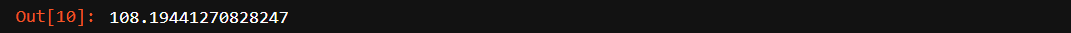
(The authors' note: There may be some differences in the time taken for each running. The above is the result when writing the paper.)

In [16]:
y_pred = opt_model.predict(x_test)
metrics.accuracy_score(y_test,y_pred)

0.8976913051573264

In [17]:
metrics.f1_score(y_test, y_pred, labels=None,average='micro', sample_weight=None)

0.8976913051573264

In [18]:
metrics.f1_score(y_test, y_pred, labels=None,average='macro', sample_weight=None)

0.8414984144097571

In [19]:
metrics.precision_score(y_test, y_pred, labels=None, average=None)

array([0.77590696, 0.89651413, 0.94078116])

In [20]:
metrics.recall_score(y_test, y_pred, labels=None, average=None)

array([0.59449395, 0.94495085, 0.92182575])

In [21]:
metrics.confusion_matrix(y_test, y_pred, labels=None, sample_weight=None)

array([[ 4470,  2937,   112],
       [ 1237, 37009,   919],
       [   54,  1335, 16379]], dtype=int64)

In [22]:
y_pred_t = opt_model.predict(x_train)
metrics.accuracy_score(y_train,y_pred_t)

0.9693723526634616

In [23]:
metrics.confusion_matrix(y_train, y_pred_t, labels=None, sample_weight=None)

array([[14168,  3340,    97],
       [  533, 90724,   231],
       [    6,   399, 40889]], dtype=int64)